# **Tidying**

Part of the data engineering process is data cleaning and tidying. What is done in those two processes, is trying to make the data more readable, and complete. This makes much easier to analyze, visualize, and train the data.


## **Data Tidying**

Making the data more organized, and readable is the result of applying data tidying. 

In this section two main pandas functions are used in data tidying those are `melt` and `pivot_table`.

Let's start by taking a look at the below dataframe, which represents the income ranges based on religion. This is part of the PEW research, which is famous in the US for conducting pollings and surveys on citizens.

When the following are satisfied:


1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

We can then say that our dataset is *tidy*.

First we need to import pandas to read csv datasets.

In [1]:
import pandas as pd
import numpy as np


ModuleNotFoundError: No module named 'pandas'

### **PEW Research Dataset**

1. Start by Importing the dataset into a pandas dataframe.

In [11]:
pew_data = pd.read_csv('./CSVs/pew-raw.csv')
pew_data

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35
5,Evangelical Prot,575,869,1064,982,881,1486
6,Hindu,1,9,7,9,11,34
7,Historically Black Prot,228,244,236,238,197,223
8,Jehovahs Witness,20,27,24,24,21,30
9,Jewish,19,19,25,25,30,95


2. Observe the dataset using the `loc`, `iloc`, `head`, or `tail` approaches

***What does not seem right in the above dataframe?***

3. Try to make the column headers represent a variable not a value. For that, use the `melt` function.

In [13]:
pew_tidy = pd.melt(pew_data, id_vars=['religion'], var_name='Income_range', value_name='Citizen_count')
pew_tidy

,religion,Income_range,Citizen_count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Dont know/refused,<$10k,15
5,Evangelical Prot,<$10k,575
6,Hindu,<$10k,1
7,Historically Black Prot,<$10k,228
8,Jehovahs Witness,<$10k,20
9,Jewish,<$10k,19


In [15]:
# Using Lambda function
pew_tidy['Income_range'] = pew_tidy['Income_range'].apply(lambda x:'$0-10k' if x=='<$10k' else x)
# Using Replace
# pew_tidy.replace('<$10k','$0-10k')

### **Billboard Dataset**

This dataset outlines data about the top hit songs on the Billboard list and the week from entrance that it was in the billboard with the ranking.

1. Read the dataset and store it in a pandas dataframe. Note that the usual utf-8 encoding does not work on this dataset. The reason behind this is that there might be characters that are not supported by `utf-8`.

The suggestion is to use for this dataset `unicode_escape` encoding. (converts all non-ASCII characters into their \uXXXX representations)

In [23]:
df_bill = pd.read_csv('./CSVs/billboard.csv', encoding='unicode-escape')
df_bill.head(5)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. Observe the first few rows of the dataset.

***What is wrong with the above dataset?***

3. Let's, again, use the `melt` function to fix the general structure of the dataframe.

In [24]:
id_vars = df_bill.columns[:7]
df_bill = df_bill.melt(id_vars=id_vars, var_name="Week", value_name="Rank")
df_bill.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,Week,Rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0


If we inspect the current dataframe. We find that it is structured in a better way than before. 

However, the ***Week*** column looks a bit ugly!

4. Let's try to place only the week number in that column without the extras surronding it.

In [27]:
df_bill['Week'] = df_bill['Week'].str.extract('(\d+)', expand=False) # Capture group should be inside the bracket and the capture group is '\d+' \d means integer digit and + means more than one digit
df_bill

,year,artist.inverted,track,time,genre,date.entered,date.peaked,Week,Rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0
...,...,...,...,...,...,...,...,...,...
24087,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,76,NaN
24088,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,76,NaN
24089,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,76,NaN
24090,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,76,NaN


5. Now let's inspect the ***Week*** column in the dataframe.

Next, let's try to find the date at which the song ranked the number that is shown per row.

6. To do that let's first think of the equation that is going to get us the relevant date at which the song ranked the *rth*.



In [28]:
df_bill.info() # gives you the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24092 entries, 0 to 24091
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             24092 non-null  int64  
 1   artist.inverted  24092 non-null  object 
 2   track            24092 non-null  object 
 3   time             24092 non-null  object 
 4   genre            24092 non-null  object 
 5   date.entered     24092 non-null  object 
 6   date.peaked      24092 non-null  object 
 7   Week             24092 non-null  object 
 8   Rank             5307 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.7+ MB


In [32]:
df_bill['Week'] = df_bill['Week'].astype(int)
df_bill['date.entered'] = pd.to_datetime(df_bill['date.entered'])
df_bill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24092 entries, 0 to 24091
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   year             24092 non-null  int64         
 1   artist.inverted  24092 non-null  object        
 2   track            24092 non-null  object        
 3   time             24092 non-null  object        
 4   genre            24092 non-null  object        
 5   date.entered     24092 non-null  datetime64[ns]
 6   date.peaked      24092 non-null  object        
 7   Week             24092 non-null  int64         
 8   Rank             5307 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 1.7+ MB


*Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.*


In [36]:
df_bill['Rank_date'] = df_bill['date.entered']+pd.to_timedelta(df_bill['Week'], unit='W')-pd.DateOffset(weeks=1)
df_bill

,year,artist.inverted,track,time,genre,date.entered,date.peaked,Week,Rank,Rank_date
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0,2000-09-23
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0,2000-02-12
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0,1999-10-23
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0,2000-08-12
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0,2000-08-05
...,...,...,...,...,...,...,...,...,...,...
24087,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,76,NaN,2002-01-12
24088,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,76,NaN,2001-07-21
24089,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,76,NaN,2002-02-09
24090,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,76,NaN,2001-12-08


***What is the problem with the calculation above?***

7. Let's only keep necessary columns

In [37]:
df_bill.drop(columns=['date.entered', 'Week', 'date.peaked'], inplace=True)

8. How to rename your columns?

In [39]:
df_bill.rename(columns={'year':'Year', 'artist.inverted':'Artist','track':'Track', 'time':'Time', 'genre':'Genre'})

,Year,Artist,Track,Time,Genre,Rank,Rank_date
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,78.0,2000-09-23
1,2000,Santana,"Maria, Maria",4:18,Rock,15.0,2000-02-12
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,71.0,1999-10-23
3,2000,Madonna,Music,3:45,Rock,41.0,2000-08-12
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,57.0,2000-08-05
...,...,...,...,...,...,...,...
24087,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,NaN,2002-01-12
24088,2000,"Smith, Will",Freakin' It,3:58,Rap,NaN,2001-07-21
24089,2000,Zombie Nation,Kernkraft 400,3:30,Rock,NaN,2002-02-09
24090,2000,"Eastsidaz, The",Got Beef,3:58,Rap,NaN,2001-12-08


Display the dataframe

In [41]:
df_bill

,year,artist.inverted,track,time,genre,Rank,Rank_date
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,78.0,2000-09-23
1,2000,Santana,"Maria, Maria",4:18,Rock,15.0,2000-02-12
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,71.0,1999-10-23
3,2000,Madonna,Music,3:45,Rock,41.0,2000-08-12
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,57.0,2000-08-05
...,...,...,...,...,...,...,...
19663,2000,Lonestar,Amazed,4:25,Country,45.0,2000-08-12
19700,2000,Creed,Higher,5:16,Rock,50.0,2000-11-18
19980,2000,Lonestar,Amazed,4:25,Country,50.0,2000-08-19
20017,2000,Creed,Higher,5:16,Rock,50.0,2000-11-25


In the above dataframe, there are some *NaN* values. What are we going to do? <br/>
9. Apply quick data cleaning and then observe the dataset

In [40]:
df_bill = df_bill.dropna()

## **Data Cleaning**

Data cleaning involves removing unwanted characters, imputing, or dropping missing values.

The decision is based on the dataset you have, and the information you can extract from the other columns.


Examples of data cleaning include cleaning:

1.   **Missing Data**
2.   **Irregular Data** (Outliers)
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
4.   **Inconsistent Data** — Capitalization, Addresses and more








### **Cars Data Set**

Start by reading the dataset related to car models: ./CSVs/cars.csv

In [50]:
df_cars = pd.read_csv('./CSVs/cars.csv', delimiter=';')
df_cars

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
1,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
3,Plymouth Satellite,NaN,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US
...,...,...,...,...,...,...,...,...,...
402,Ford Mustang GL,27.0,4,140.0,86.00,2790.,15.6,82,US
403,Volkswagen Pickup,44.0,4,97.00,52.00,2130.,24.6,82,Europe
404,Dodge Rampage,32.0,4,135.0,84.00,2295.,11.6,82,US
405,Ford Ranger,28.0,4,120.0,79.00,2625.,18.6,82,US


First Row seems to be the datatype, we need to remove it

In [51]:
df_cars = df_cars.drop(index=0)
df_cars

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,Chevrolet Chevelle Malibu,NaN,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
3,Plymouth Satellite,NaN,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US
5,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US
...,...,...,...,...,...,...,...,...,...
402,Ford Mustang GL,27.0,4,140.0,86.00,2790.,15.6,82,US
403,Volkswagen Pickup,44.0,4,97.00,52.00,2130.,24.6,82,Europe
404,Dodge Rampage,32.0,4,135.0,84.00,2295.,11.6,82,US
405,Ford Ranger,28.0,4,120.0,79.00,2625.,18.6,82,US


Let's observe the columns with null values.  Either by using the `isnull().sum()` function 

In [52]:
df_cars.isnull().sum()

Car             0
MPG             3
Cylinders       0
Displacement    1
Horsepower      2
Weight          1
Acceleration    0
Model           0
Origin          0
dtype: int64

There aren't many missing values. Let's take a glimpse at the percentage of the missing values:

**HINT:** We'll need `Numpy` for the below task.

In [53]:
# df_cars.size
total_cells=np.product(df_cars.shape)
total_missing_cells = df_cars.isnull().sum().sum()
# percentage of missing values
percentage_of_na_values = (total_missing_cells/total_cells)*100
print(percentage_of_na_values)

0.19157088122605362


Around *0.19%* of the values are missing, which isn't a lot. Therefore, we might go with the option of dropping all the rows with null values.

In [54]:
data_cleaned = df_cars.dropna()

In [58]:
row_difference = df_cars.shape[0]-data_cleaned.shape[0]
percentage_missing = (row_difference/df_cars.shape[0])*100
percentage_missing

# If the percentage is more than 2-3% then do not drop the null values without a proper analysis.

1.2315270935960592

Lets also check dropping the columns

Let's observe how many columns we lost

### **Cars Dataset - Filling in missing values automatically**

Another option is to try and fill in the missing values through imputations.

Let's take the `MPG` column for example. We can fill in the missing values with 0s through the following line of code:

`df_cars.fillna(0) `. 

In [59]:
df_cars_temp = df_cars
df_cars_temp['MPG'].fillna(0, inplace=True)
df_cars_temp.isnull().sum()

Car             0
MPG             0
Cylinders       0
Displacement    1
Horsepower      2
Weight          1
Acceleration    0
Model           0
Origin          0
dtype: int64

However, this does not make much sense as there isn't MPG equal to 0. How about we plot the MPG column and if it follows a random distribution we can use the mean of the column to compute the missing values. Otherwise, we can use the median (if there is a skewed normal distribution). However, there might be a better way of imputation which is getting the median or the mean of the MPG of the cars with similar attributes.

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
current_MPG = data_cleaned['MPG'].astype('float')
current_MPG

5      17.0
7      14.0
8      14.0
9      14.0
10     15.0
       ... 
402    27.0
403    44.0
404    32.0
405    28.0
406    31.0
Name: MPG, Length: 401, dtype: float64

In [69]:
current_MPG_sorted = current_MPG.sort_values(ascending=True)

<Axes: ylabel='Frequency'>

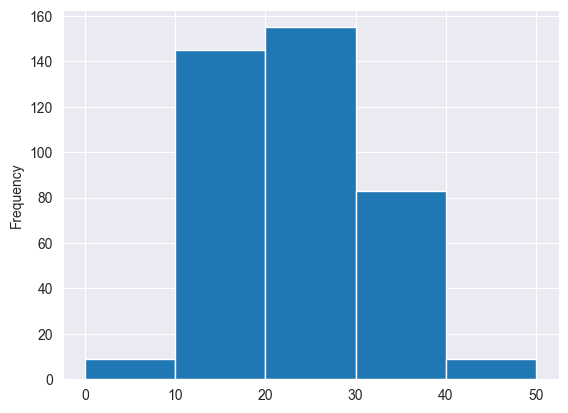

In [70]:
bins = [0,10,20,30,40,50]
current_MPG_sorted.plot.hist(bins=bins)

<Axes: xlabel='MPG', ylabel='Count'>

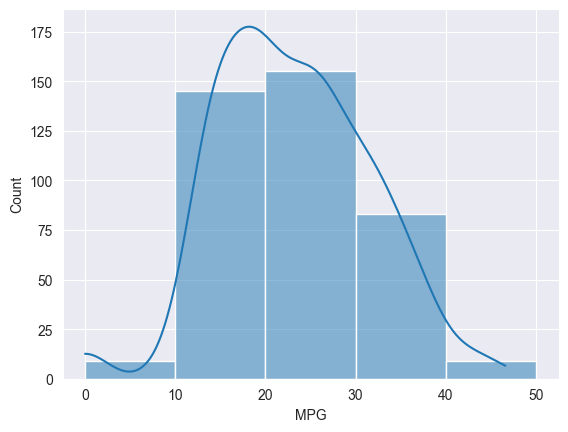

In [72]:
sns.histplot(x=current_MPG_sorted, bins=bins, kde=True)

If we observe the graph above, we can consider it in a way or another normally distributed. Therefore, we can impute the missing values using the mean.

To compute the mean we need numeric values. However the values in the dataframe are objects. Therefore, we need to change them to numerics so that we can compute them.

Now let's see what is the mean of the MPG column

In [74]:
mean = current_MPG_sorted.mean()

23.134164588528677

We can use this mean to compute the missing values since the graph demonstarted a normal distribution

In [76]:
df_cars_temp['MPG'].fillna(mean, inplace=True)
df_cars_temp

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,Chevrolet Chevelle Malibu,0,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,NaN,3693.,11.5,70,US
3,Plymouth Satellite,0,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,NaN,150.0,NaN,12.0,70,US
5,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US
...,...,...,...,...,...,...,...,...,...
402,Ford Mustang GL,27.0,4,140.0,86.00,2790.,15.6,82,US
403,Volkswagen Pickup,44.0,4,97.00,52.00,2130.,24.6,82,Europe
404,Dodge Rampage,32.0,4,135.0,84.00,2295.,11.6,82,US
405,Ford Ranger,28.0,4,120.0,79.00,2625.,18.6,82,US


### **Car Dataset - Simple Imputer**

*SimpleImputer* is a `scikit-learn` class which is helpful in handling the missing data in the predictive model dataset. It replaces the `NaN` values with a specified placeholder.
It is implemented by the use of the `SimpleImputer()` method which takes the following arguments :

`missing_values` : The missing_values placeholder which has to be imputed. By default is NaN

`strategy` : The data which will replace the NaN values from the dataset. The strategy argument can take the values – ‘mean'(default), ‘median’, ‘most_frequent’ and ‘constant’.


Let's start by importing the `SimpleImputer` into our notebook

What we need to do are two essential steps:

1. fit the data (compute the mean / median / most freq)
2. transform the data (place the computed values in the NaN cells)

In [81]:
from sklearn.impute import SimpleImputer
# strategy = "median", 'mode', 'mean', 'constant' --> fill value, 
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(df_cars.iloc[:, 1:8])

SimpleImputer()

## **Outlier Detection** 


An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s data frame.



https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/





In [82]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
columns = diabetes.feature_names
df_diabetics = pd.DataFrame(diabetes)

ValueError: Per-column arrays must each be 1-dimensional

### Outliers Visualization

In [83]:
sns.boxplot(df_diabetics)

NameError: name 'df_diabetics' is not defined

In [ ]:
df_diabetics['Sex Category'] = df_diabetics['sex']

#### Visualizing Outliers Using Box Plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

#### Visualizing Outliers Using ScatterPlot.

It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

#### Z-Score:
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.
<br>
Zscore = (data_point -mean) / std. deviation



Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

Rows where Z value is greater than 2

#### IQR (Inter-Quartile Range)
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field. <Br>
IQR = Quartile3 - Quartile1

To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :<br>
upper = Q3 + 1.5 * IQR <br>
lower = Q1 - 1.5 * IQR <br> 

- Removing the outliers:
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.